# Time series data - Pandas

## Dealing with date and time

### Importing packages
We will start off by importing the necessary libraries and packages. The numpy and pandas library are imported for dealing with the data. For visualization, matplotlib is imported. Python's built in library 'datetime' library is imported too.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from datetime import datetime

### Creating a datetime object
Now we will initialise variables of year, month, day, hour, minute and second and then create a datetime object.

In [5]:
yr = 2020
mn = 1
day = 6
hr = 15 #24 hour format
mins = 14
sec = 6

date = datetime(yr,mn,day,hr,mins,sec)
date

datetime.datetime(2020, 1, 6, 15, 14, 6)

One thing to keep in mind is that this datetime object has the datatype 'datetime'.

In [6]:
type(date)

datetime.datetime

Now from this datetime datatype, many attributes can be grabbed.

In [7]:
date.month

1

In [8]:
date.hour

15

### Datetime list

In [9]:
l1 = [datetime(2020,1,1),datetime(2020,1,2)]
l1

[datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 1, 2, 0, 0)]

In [10]:
type(l1)

list

Now we can convert this list into an index.

In [12]:
l1_indx = pd.DatetimeIndex(l1)
l1_indx

DatetimeIndex(['2020-01-01', '2020-01-02'], dtype='datetime64[ns]', freq=None)

Now this index form that you see is how the datetime is mentioned in the time series dataset.

### Time series dataframe
Now let's create a dummy dataframe with the datetime index.

In [13]:
df = np.random.rand(2,2)
df

array([[0.97590609, 0.60672033],
       [0.90397291, 0.106567  ]])

In [14]:
cols=['a','b']
dataset = pd.DataFrame(df,l1_indx,cols)
dataset

,a,b
2020-01-01,0.975906,0.606720
2020-01-02,0.903973,0.106567


We can call many methods on these indexes like finding the max or min of the index.

In [15]:
dataset.index.max()

Timestamp('2020-01-02 00:00:00')

In [16]:
dataset.index.min()

Timestamp('2020-01-01 00:00:00')

## Resampling of time
Now that we have understood the importance and usage of datetime index. The next thing is understand is resampling of time. Usually the datasets which have datetime index are mentioned on a smaller scale. That is each row in the dataset corresponds to a day, hour or minute. But to understand the data better, at time its better to just aggregate the data. This is done based off some frequency like monthly, quarterly or half yearly. This is where pandas comes into picture. With its frequency sampling tools, these functions can be easily performed.

To understand this concept practically, we will perform sampling on a stocks data. The link is provided at the end of the article.

### Reading of data

In [17]:
df = pd.read_csv('stocks.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


So the date column has to be converted into the index. But before we convert it, we need to check the dataype. Currently the datatype is object but we need to change it into datetime datatype.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [21]:
df.Date = pd.to_datetime(df.Date)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


Now we will make the Date column as the index.

In [23]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


Another shorted way of converting the dates into datetime object and also making them the index is to mention the index column and parsing value as true while reading the csv file. The parse_dates argument will automatically parse the dates as datetime object.

In [ ]:
df = pd.read_csv('stocks.csv',index_col='Date',parse_dates=True)

### Resampling
By calling the resample() method on the dataframe, we can do the sampling. The argument it takes is rule-how you want to resample. Here we will use 'A' which resamples based on the end of the year and perform some aggregation operation.

In [24]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


We can also create our own aggregate function. Like extracting the last entry of the year.

In [25]:
def last(entry):
    return entry[-1]

In [26]:
df.resample(rule='A').apply(last)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.489998,68.300003,67.370003,68.230003,7012500,60.977077
2013-12-31,78.660004,78.870003,78.349998,78.690002,3859100,72.052783
2014-12-31,87.080002,87.440002,85.860001,85.879997,4151400,80.606085
2015-12-31,61.330002,61.720001,61.169998,61.299999,6555100,59.135363
2016-12-31,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


### Plotting

Now we can plot the individuals columns based off some frequency according to our needs.

<AxesSubplot:xlabel='Date'>

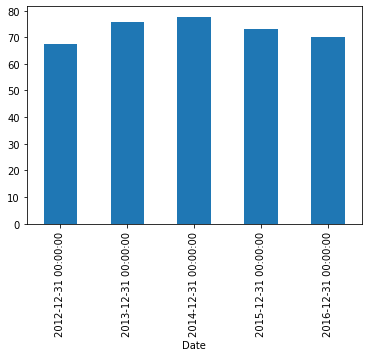

In [29]:
df['High'].resample('A').mean().plot(kind='bar')

## Shifting of time

At times, we need to move our forward back or forth with a certain amount of time steps, this is called as time shifting. Pandas has the necessary methods to help us do this. The shift() method helps in doing this. It takes the argument period - which is the no. of periods we want to shift with. So if we menion the period as 1, the rows values will shift one down.

In [31]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [32]:
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


So the first row has null values and the row values are shifted one down. To shift it upwards, we mention negative value of period.

In [33]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [34]:
df.shift(periods=-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


Now let's look into how to shift the index instead of the data. Incase, you want to change all the days in a particular month to the same day value, it can be done using the tshift() method. By mentioning the frequency argument, the changes can be made.

In the dataframe, we will try to change all the days of a particular month to have the same day.

In [35]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [36]:
df.tshift(freq='M').head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


Now you can see that all the days in the first month of january is 31st.

## Rolling and expanding of data

The time series data especially fincancial data can be noisy at times which can give issues while recognising a pattern. So by rolling the data based on some function like mean we can get a general trend idea. Rolling is also referred to as moving average. 

We will set a window for a time interval and then perform the aggregate function on that interval.

We will plot the data so as to understand the difference when it is rolled.

<AxesSubplot:xlabel='Date'>

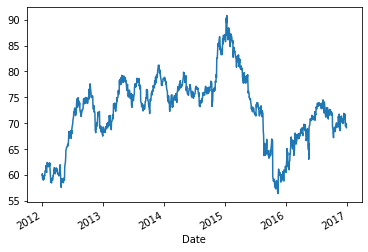

In [37]:
df.Open.plot()

Now as you can see above, there is a lot of noise since it the daily data. So what we can do is average the data (rolling mean/moving average) for a window of a week. 

The rolling() method is used and the window argument is passed which is the size of the moving window. So we will mention it as 7, since we want it for a week.

In [39]:
df.rolling(7).mean().head(9)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


Now the first 6 rows are empty because there wasn't any enough data to fill the value. The 7th row's value is the average of the first 7 rows values. The 8th row has the value of the average of itself and the previous 6 rows and so on. 

Now we will plot the rolled data and see the difference. We will take the window as 30 days.

<AxesSubplot:xlabel='Date'>

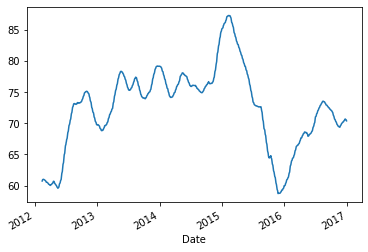

In [42]:
df.rolling(30).mean()['Open'].plot()

Now you can see that this plot has less noise compared to the previous one and the trend can be seen in a better way. 

<AxesSubplot:xlabel='Date'>

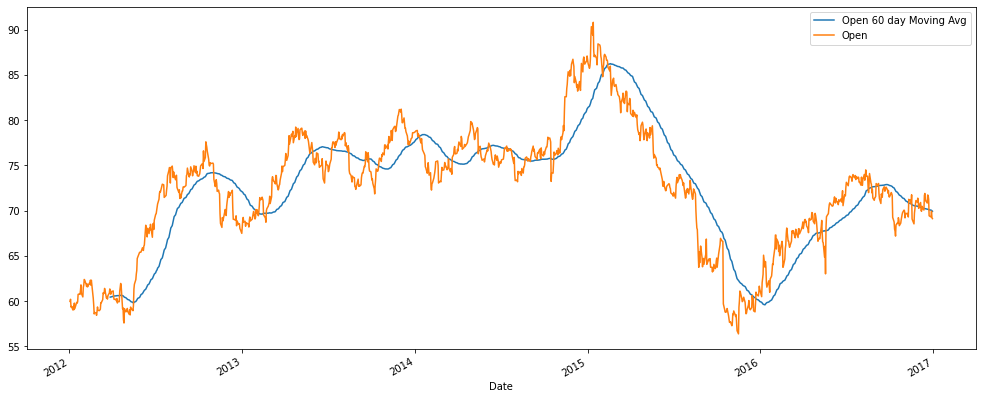

In [53]:
df['Open 60 day Moving Avg'] = df.Open.rolling(60).mean()
df[['Open 60 day Moving Avg','Open']].plot(figsize=(17,7))

Now suppose you want to take everything from the beginning of the time series data to the end for analysis, this can be done by expanding function.

The expanding() function takes the argument of min_periods which is the value of the minimum period. So what this does is, for a particular time step, it takes the value of all the previous values and averages it out.

<AxesSubplot:xlabel='Date'>

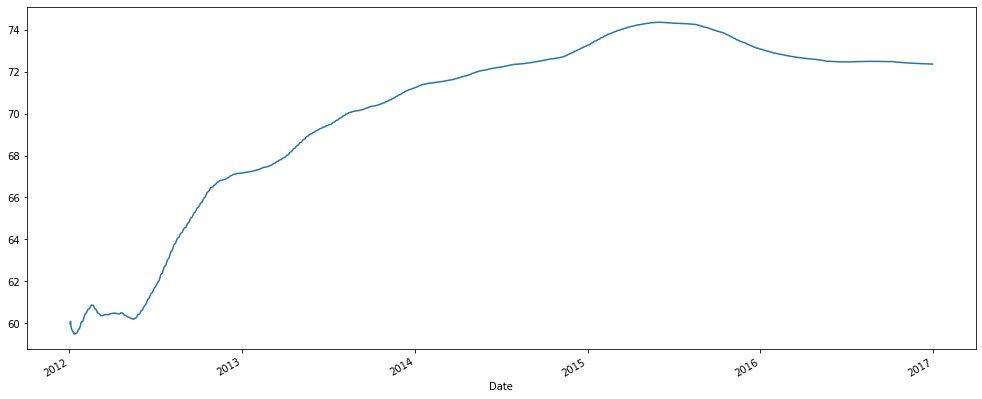

In [54]:
df['Open'].expanding().mean().plot(figsize=(17,7))